In [1]:
import numpy as np
import pandas as pd
import spei as si 
import geopandas as gpd
from shapely.geometry import Point
import fiona 
from pyproj import CRS


In [2]:
streamflow_data = "//gmvstorage.gmv.es/storage/anin/Streamflow/processed_data/clean_streamflow.xlsx"
df_streamflow = pd.read_excel(streamflow_data, index_col=0)

metadata = "//gmvstorage.gmv.es/storage/anin/Streamflow/processed_data/clean_metadata.xlsx"
df_metadata = pd.read_excel(metadata, index_col=0)

df_streamflow = df_streamflow.rename(columns={df_streamflow.columns[0]: 'date'})
df_streamflow.set_index('date')

,C5H012,C5H014,C5H022,D1H001,D1H003,D1H006,D1H009,D1H011,D2H012,D3H015,...,B7H013,B7H014,B8H008,B8H009,B8H010,B8H014,B8H017,B8H019,B9H001,B9H002
date,,,,,,,,,,,,,,,,,,,,,
0.000,1.720,NaN,NaN,0.047,251.219,38.908,230.978,34.943,1.567,NaN,...,NaN,0.082,2.443,1.632,0.490,0.809,0.674,NaN,NaN,NaN
0.000,0.000,NaN,NaN,NaN,86.176,NaN,NaN,8.127,2.562,NaN,...,0.833,0.054,NaN,1.184,0.752,0.724,0.370,NaN,NaN,NaN
0.000,0.000,NaN,NaN,NaN,159.114,NaN,141.162,15.446,2.495,NaN,...,0.953,NaN,5.084,2.932,1.875,1.442,NaN,NaN,NaN,NaN
0.000,0.000,NaN,NaN,0.006,109.236,5.644,NaN,NaN,0.723,NaN,...,NaN,NaN,7.083,3.183,3.514,2.248,9.055,NaN,NaN,NaN
0.059,0.006,NaN,NaN,0.301,144.546,9.395,NaN,10.461,1.176,NaN,...,2.602,0.309,8.583,7.981,11.611,5.415,38.803,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
streamflow_data = df_streamflow.iloc[:,0]

In [4]:
from ssfi_tools import sum_to_scale

In [6]:
dates = streamflow_data.index.to_pydatetime()

scaled_np = sum_to_scale(streamflow_data,3)
scaled_np_unstacked = np.hsplit(scaled_np,1)
scaled_ts = np.vstack(scaled_np_unstacked).T
scaled_ts = pd.Series(data = scaled_ts.flatten(), index=dates)
positions = scs.mstats.plotting_positions(scaled_ts,0,0)

z = positions

# Step 7: SSI Calculation
ssi = (z - np.mean(z)) / np.std(z)

ssi_np = pd.Series(data = ssi, index=dates)

In [ ]:
# Step 2: Log-transformation
dates = streamflow_data.index.to_pydatetime()

# Step 3: Plotting Positions
positions = scs.mstats.plotting_positions(streamflow_data,0,0)

# Step 6: Standardization
z = positions

# Step 7: SSI Calculation
ssi = (z - np.mean(z)) / np.std(z)

ssi_np = pd.Series(data = ssi, index=dates)
ssi_np

In [7]:
streamflow_data = streamflow_data.dropna( )
ssi_gamma = si.ssfi(streamflow_data, dist=scs.gamma)

Text(0, 0.5, 'SSFI gamma distribution')

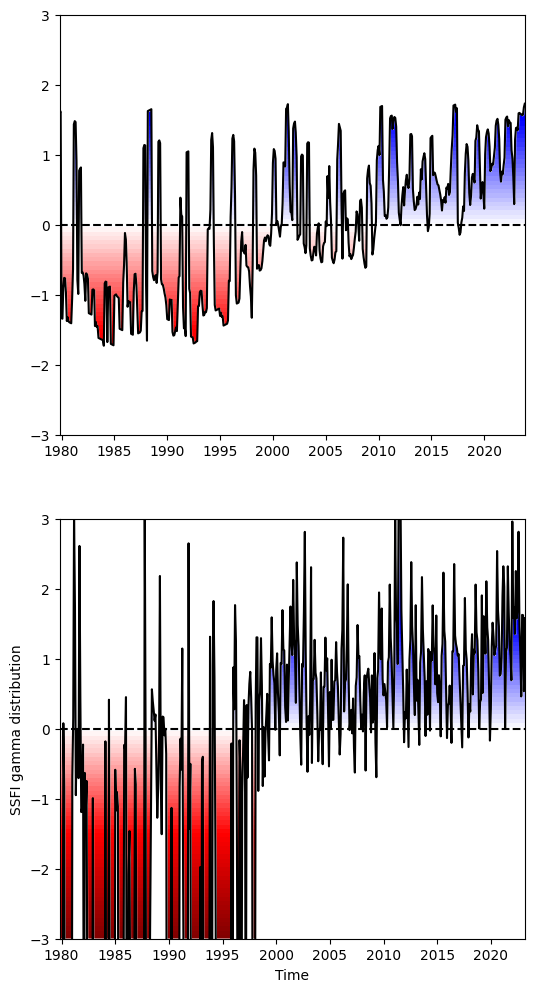

In [8]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(6, 12))

# Plot the data for each dataframe in a subplot
si.plot.si(ssi_np, ax = axes[0])
plt.xlabel("Time")
plt.ylabel("SSFI non parametric")

si.plot.si(ssi_gamma, ax = axes[1])
plt.xlabel("Time")
plt.ylabel("SSFI gamma distribution")